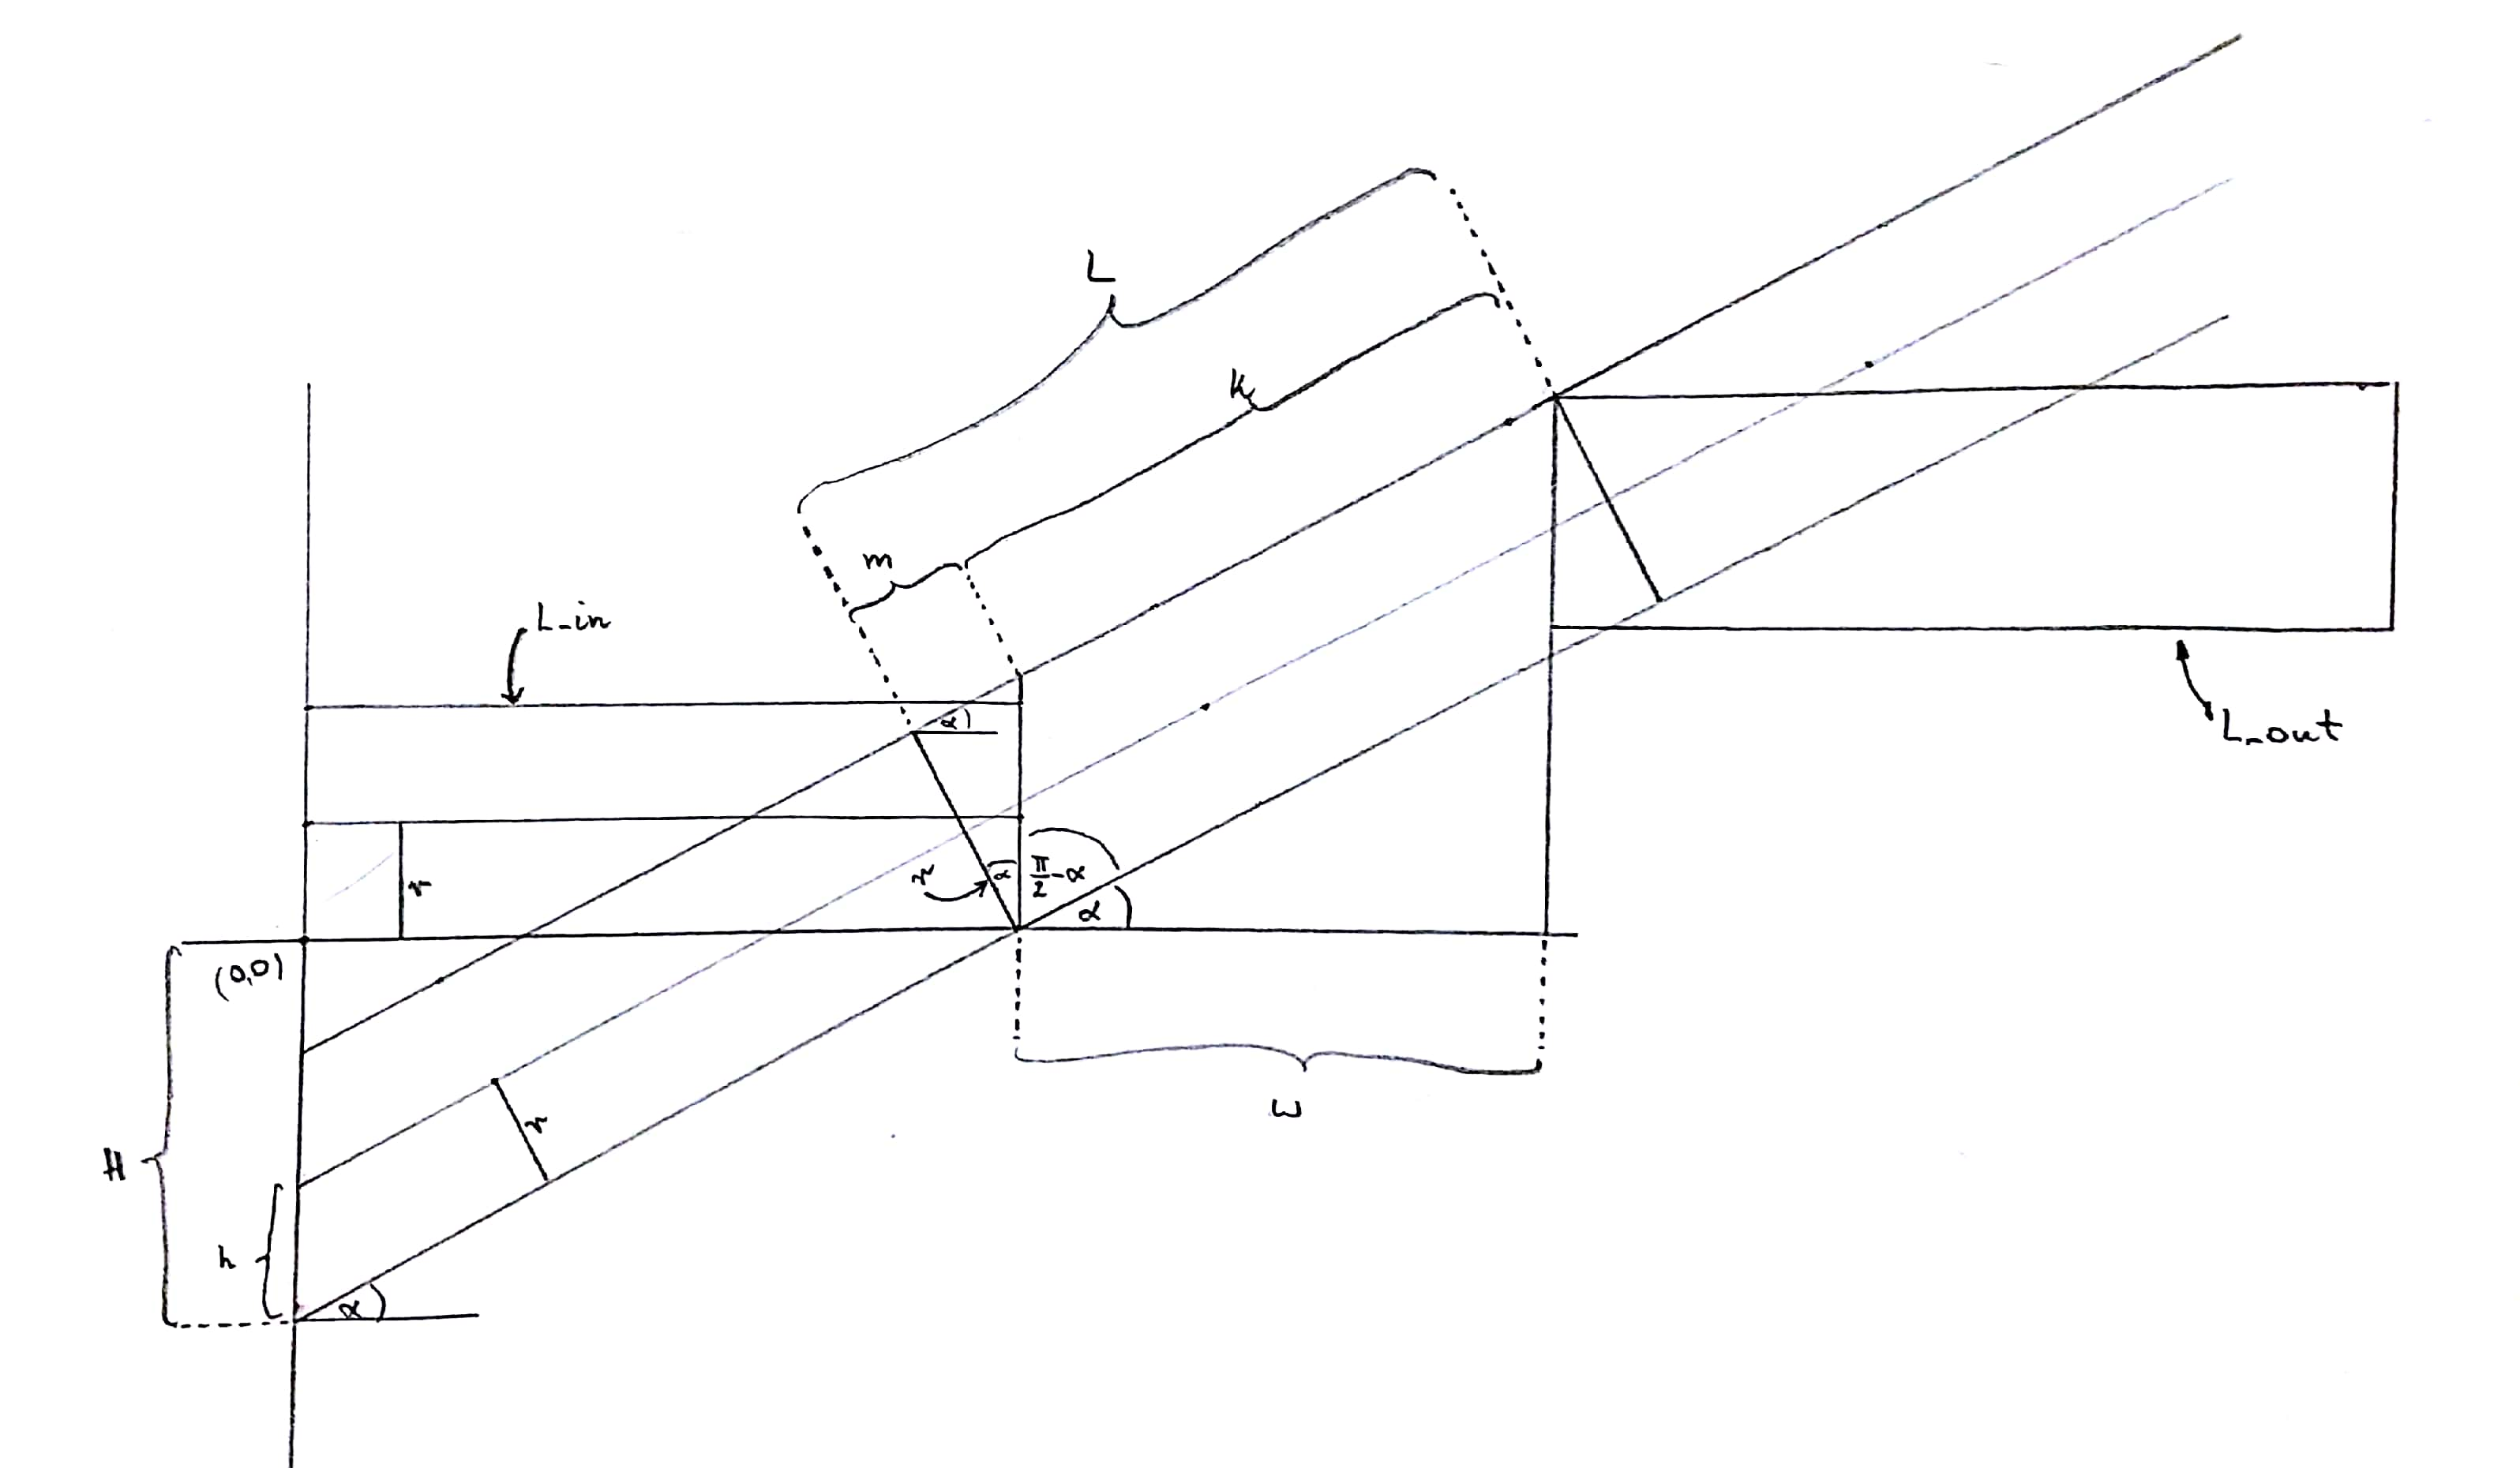

In [347]:
from IPython.display import Image
Image(filename='broken_pipe_2d_centerlines_fig.jpg', width=1000)

In [348]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [404]:
alpha = math.pi/4.1   # kat [0; pi/4)
L = 500               # dlugosc skosnej rury
L_in = L_out = 150    # dlugosc rur in/out
r = 25                # promien rury

In [405]:
assert 0 < alpha <= math.pi/4.
assert L > 0
assert L_in > 0
assert L_out > 0
assert r > 0

In [406]:
x_max = int(L_in + L_out + np.cos(alpha)*L)
y_max = int(np.sin(alpha)*L + 2*np.cos(alpha)*r)
H = np.tan(alpha) * L_in
h = r / np.sin(np.pi/2-alpha)
m = 2 * r * np.tan(alpha)
k = L - m
w = np.cos(alpha) * k

D = np.ones((y_max, x_max))
X, Y = np.meshgrid(np.linspace(0, x_max-1,x_max), np.linspace(0, y_max-1,y_max))

Odległość punktu $P=(x,y)$ od prostej $K: Ax+By+C=0$, $ax+b=y$:

$d(P, K) = \frac{|Ax+By+C|}{\sqrt{A^2+B^2}}$

$d(P, K) = \frac{|ax-y+b|}{\sqrt{a^2+1}}$

In [407]:
def d(X,Y,a,b):
    return np.abs(a*X - Y + b) / np.sqrt(a*a+1)

def extend_y(A, how_many=1, new_val=1):
    A2 = np.full((A.shape[0]+2*how_many, A.shape[1]), new_val, dtype=type(new_val))
    A2[how_many:-how_many, :] = A
    return A2

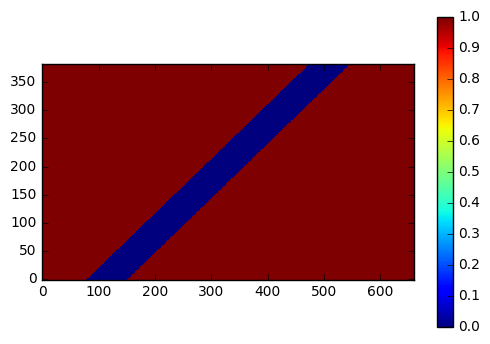

In [408]:
D_mid = D.copy()
a = np.tan(alpha)
b = -(H-h)
D_mid[(r >= d(X,Y,a,b)) & (Y<=y_max)] = 0

plt.imshow(D_mid,origin='lower',interpolation='nearest')
plt.colorbar();

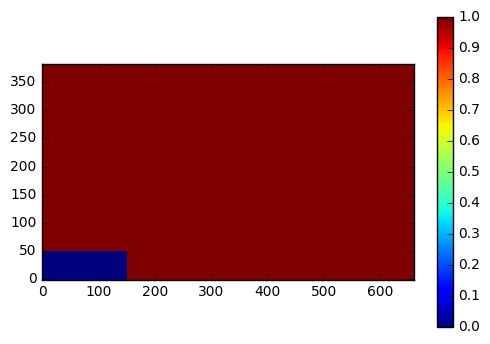

In [409]:
D_in = D.copy()
a = 0
b = r
D_in[(r >= d(X,Y,a,b)) & (X <= L_in)] = 0

plt.imshow(D_in,origin='lower',interpolation='nearest')
plt.colorbar();

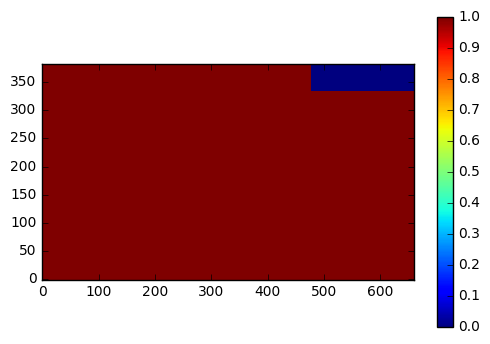

In [410]:
D_out = D.copy()
a = 0
b = y_max - r
D_out[(r >= d(X,Y,a,b)) & (X >= L_in + w) & (X < x_max)] = 0

plt.imshow(D_out,origin='lower',interpolation='nearest')
plt.colorbar();

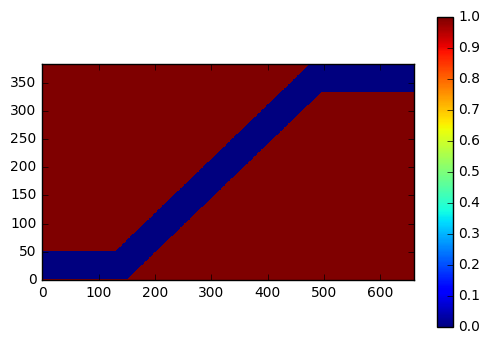

In [411]:
D_all = reduce(np.logical_and, [D_mid, D_in, D_out])
D_all = extend_y(D_all)
plt.imshow(D_all,origin='lower',interpolation='nearest')
plt.colorbar();

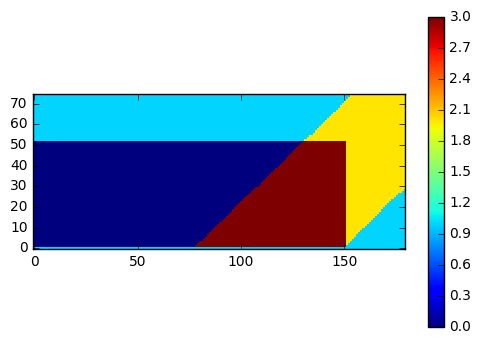

In [412]:
D_tmp = D_in.copy()
D_tmp[D_mid==0] = 2
D_tmp[(D_mid==0) & (D_in==0)] = 3
D_tmp = extend_y(D_tmp)

x_from = int(0.7*L_in)
x_to = int(1.2*L_in)
y_to = int(3*r)
plt.imshow(D_tmp[:y_to, :x_to],origin='lower',interpolation='nearest')#aspect='auto'
plt.colorbar();

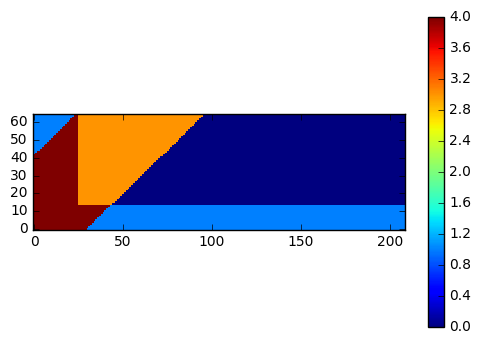

In [413]:
D_tmp = D_out.copy()
D_tmp[D_mid==0] = 4
D_tmp[(D_out==0) & (D_mid==0)] = 3
D_tmp = extend_y(D_tmp)

x_from = int(0.95*(L_in+w))
y_from = int(y_max-2.5*r)
x_to = int(1.1*(L_in+w))
y_to = int(y_max+0.5*r)
plt.imshow(D_tmp[y_from:, x_from:],origin='lower',interpolation='nearest')
plt.colorbar();

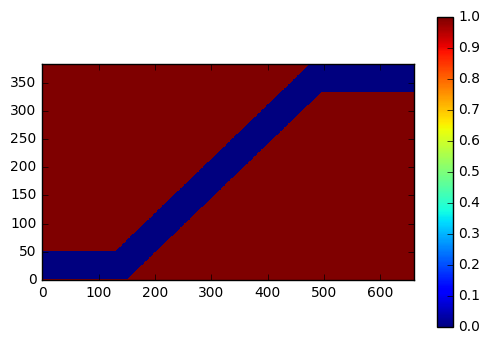

In [414]:
plt.imshow(D_all,origin='lower',interpolation='nearest')
plt.colorbar();

In [415]:
path = "/DATA/shared/"
filename = 'broken_pipe_2d_centerlines_geometry'

np.savez(filename,geo=D_all, alpha=alpha, D=2*r, L=L, L_in=L_in, L_out=L_out)
g = np.load(filename + '.npz')